# Exploratory Data Analysis and Statistical Testing on Monthly Data

In [19]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from datetime import datetime,timedelta
import seaborn as sns

# Statistical Analysis Libraries
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module= "scipy",    
    message="^internal gelsd"
)
warnings.filterwarnings(
    action="ignore",
    module= "numpy",    
    message="^internal gelsd"
)

In [20]:
df = pd.read_csv('monthly10.csv')

In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      832 non-null    object 
 1   y       832 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.5+ KB


In [23]:
df.describe()

,y
count,832.000
mean,5.605
std,2.927
min,0.620
25%,3.450
50%,5.015
75%,7.403
max,15.320


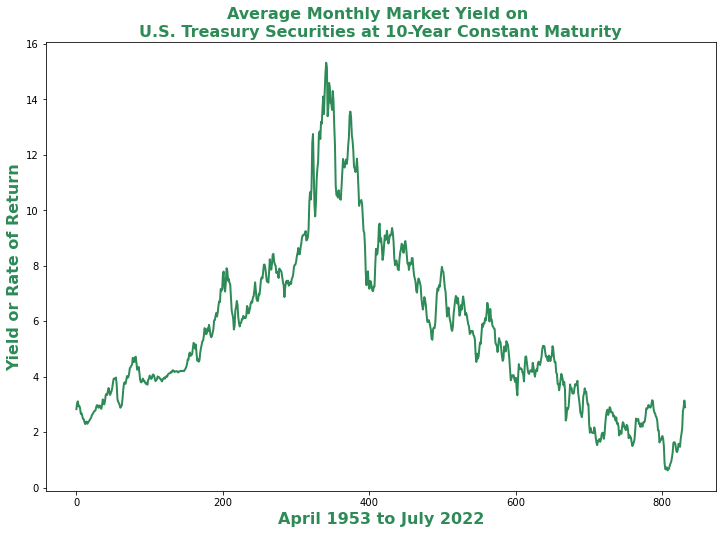

In [12]:
plt.plot(df['y'], linewidth=2, color='seagreen')
plt.rcParams["figure.figsize"] = (12,8.25)
plt.ylabel('Yield or Rate of Return', fontweight='bold', fontsize = 16, color='seagreen')
plt.xlabel('April 1953 to July 2022',fontweight='bold', fontsize = 16, color='seagreen')
plt.title('Average Monthly Market Yield on \nU.S. Treasury Securities at 10-Year Constant Maturity', fontweight='bold', fontsize = 16, color='seagreen')
plt.show()

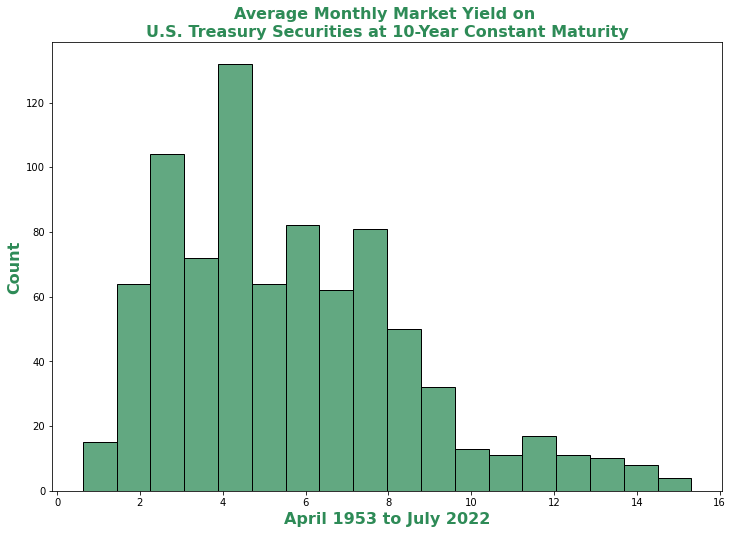

In [16]:
sns.histplot(df['y'], color = 'seagreen')
plt.rcParams["figure.figsize"] = (12,8.25)
plt.ylabel('Count', fontweight='bold', fontsize = 16, color='seagreen')
plt.xlabel('April 1953 to July 2022',fontweight='bold', fontsize = 16, color='seagreen')
plt.title('Average Monthly Market Yield on \nU.S. Treasury Securities at 10-Year Constant Maturity', fontweight='bold', fontsize = 16, color='seagreen')
plt.show()

## Statistical Testing

### Test run for Stationarity

#### Is the first two moments of the distribution stable?

In [8]:
# test run for stationarity
result = adfuller(df['y'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic: -1.125099
p-value: 0.704960
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


#### No, the first two moments of distribution are not stable because we fail to reject the null hypothesis as the p - value is greater than 0.05.

#### However, the ADF Statistic is close to zero and the cascade of critical values show that the non - stationary is not very strong.

#### There is some stable stationary parts of the dataset, but less than the non - stationary parts.

### Test run for Normality

#### Is the dataset normally distributed, and if not, then how far is it from a normal distribution?

In [9]:
# normality test
stat, p = jarque_bera(df['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=104.519, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
df['y'].skew(), df['y'].kurt()

(0.8411837399066269, 0.45128325375754086)

#### In a similar fashion to stationarity, the dataset is non - normal, but the JB statistic is far from zero.

#### There is some level of normality in the dataset as both the third and fourth moments of distribution are near zero.

#### Overall, taking the two tests above shows regime switching in the dataset as past behavior may differ from future behavior.